In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
%matplotlib inline

In [37]:


# функция вывода значения метрик (в случае с регрессией - MSE и RMSE)

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.3f}, RMSE = {rmse:.2f}')
    
#Проверка в моделе определенной даты
def test_date(date,model):
    test=source_3[source_3.index==date]
    test_y=test['y']
    test=test.drop(['y'], axis = 1)
    test_scaler = scaler_x.transform(test)
    test_scaler_pred = model.predict(test_scaler)
    test_pred=int(scaler_y.inverse_transform(test_scaler_pred))
    print('Предсказание-'+str(test_pred),'Факт-'+str(test_y[0]),'Расхождение-'+str(int((test_pred-test_y[0])*100/test_y[0]))+'%')

In [38]:
source_3 = pd.read_excel("processed_data\\3_source_de.xlsx", 
                 index_col=0)


In [39]:
x = source_3.iloc[:,1:].values    # массив признаков

Y = source_3.iloc[:,0].values      # массив значений

In [40]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x)
X_scaler = scaler_x.transform(x)
scaler_y = StandardScaler()
scaler_y.fit(Y.reshape(-1,1)) 
y_scaler = scaler_y.transform(Y.reshape(-1,1))


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaler, y_scaler, test_size = 0.2, random_state = 42) 

## Градиентный бустинг

In [42]:
#Загрузим модель градиентного бустинга для регрессии GradientBoostingRegressor из библиотеки sklearn
from sklearn.ensemble import GradientBoostingRegressor
# ПОДБОР ПАРАМЕТРОВ:
#скорость обучения learning_rate=0.1, 
#количество деревьев n_estimators=100,
#глубина деревьев max_depth=3, 
#минимальное количество выборок min_samples_split=2, 
#минимальное число объектов в листе min_samples_leaf=1,
#минимальное количество выборок, необходимых для нахождения в листовом узле subsample=1, 
#максимальное число признаков, по которым ищется лучшее разбиение в дереве max_features=None, 
#случайность random_state =42
grad = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None, random_state =42)
#Обучение модели
grad.fit(X_train, Y_train)
#Получим предсказание
grad.predict(X_test)
#оценка результата
grad.score(X_test, Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.872795425406311

In [43]:
y_pred2 = grad.predict(X_test)
print_regression_metrics(Y_test, y_pred2)
date='2021-03-07'
test_date(date,grad)

MSE = 0.154, RMSE = 0.39
Предсказание-58537 Факт-58360 Расхождение-0%


## Вывод
### Наилучший результат показал метод Градиентного спуска, расхождение предсказанного значения от фактического минимально

## Нейронка

In [44]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
import sklearn
import matplotlib.pyplot as plt

In [45]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((53, 6), (53, 1), (14, 6), (14, 1))

In [46]:
clear_session()

In [47]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],))) # первый скрытый слой
model.add(Dense(512, activation='relu',))
model.add(Dense(256, activation='relu',))
model.add(Dense(128, activation='relu',))
model.add(Dense(128, activation='relu',))
model.add(Dense(256, activation='relu',)) 
model.add(Dense(14, activation='softmax',)) # выходной слой

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               3584      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 14)                3

In [49]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это :)
    metrics=['mse']  # выводим процент правильных ответов
)

In [50]:
y_train_oh = keras.utils.to_categorical(Y_train, 14)
y_test_oh = keras.utils.to_categorical(Y_test, 14)

print(y_train_oh.shape)
print(y_train_oh[:5], Y_train[:5])

(53, 14)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [[ 1.15729521]
 [-0.73925959]
 [ 1.33013092]
 [-0.61636071]
 [ 1.23966166]]


In [51]:
history = model.fit(
                    X_train, 
                    y_train_oh,
                    batch_size=256,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=16,  # 10 проходов по датасету
                    validation_data=(X_test, y_test_oh)
                    )

Epoch 1/16
1/1 [==============================] - 1s 747ms/step - loss: 2.6456 - mse: 0.0664 - val_loss: 2.5233 - val_mse: 0.0651
Epoch 2/16
1/1 [==============================] - 0s 38ms/step - loss: 2.5302 - mse: 0.0652 - val_loss: 2.3430 - val_mse: 0.0629
Epoch 3/16
1/1 [==============================] - 0s 40ms/step - loss: 2.3726 - mse: 0.0633 - val_loss: 2.0529 - val_mse: 0.0583
Epoch 4/16
1/1 [==============================] - 0s 37ms/step - loss: 2.1202 - mse: 0.0595 - val_loss: 1.6510 - val_mse: 0.0499
Epoch 5/16
1/1 [==============================] - 0s 40ms/step - loss: 1.7563 - mse: 0.0525 - val_loss: 1.1595 - val_mse: 0.0362
Epoch 6/16
1/1 [==============================] - 0s 50ms/step - loss: 1.2904 - mse: 0.0403 - val_loss: 0.6985 - val_mse: 0.0226
Epoch 7/16
1/1 [==============================] - 0s 39ms/step - loss: 0.8160 - mse: 0.0257 - val_loss: 0.4075 - val_mse: 0.0154
Epoch 8/16
1/1 [==============================] - 0s 39ms/step - loss: 0.5053 - mse: 0.0171 - va

In [52]:
y_pred = model.predict(X_test)

In [53]:
Y_test.shape, y_pred.shape

((14, 1), (14, 14))

In [54]:
print_regression_metrics(y_test_oh, y_pred)

MSE = 0.004, RMSE = 0.06


## Вывод
### Применение нейронной сети позволило снизить ошибки MSE до 0.007 RMSE  до 0.09

## Временные ряды

In [55]:
import seaborn as sns
import IPython
import IPython.display
df = pd.read_excel("processed_data\\3_source_de.xlsx")
date_time = pd.to_datetime(df.pop('Date'), format='%Y.%m.%d')

In [56]:
# Разделим данные
# будем использовать разделение (70%, 20%, 10%) для наборов для обучения, проверки и тестирования. Данные не перемешиваются случайным образом перед разделением:
# Это гарантирует, что разделение данных на окна последовательных выборок по-прежнему возможно.
# Это гарантирует, что результаты проверки / тестирования более реалистичны, поскольку они оцениваются на основе данных, собранных после обучения модели.

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [57]:
# Нормализуем данные
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


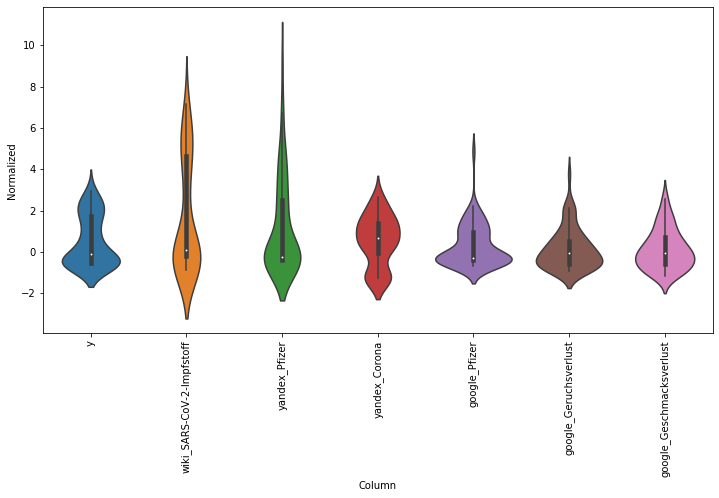

In [58]:
# посмотрим на распределение функций
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [59]:
# Создаем класс WindowGenerator для работы с окнами данных
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Сохранение необработанных данных
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Определение индекса столбца
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Параметры окна
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [60]:
# Создаем окно размером 7 недель: на основе 6 недель предсказываем 7-ую неделю
w1 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['y'])
w1

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['y']

In [61]:
# Функция для разбиения входных данных на сплиты
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [62]:
np.array(train_df[:w1.total_window_size]).shape

(7, 7)

In [63]:
# Объединим в одно окно: 
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[10:10+w1.total_window_size]),
                           np.array(train_df[20:20+w1.total_window_size])])


example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 7)
Inputs shape: (3, 6, 7)
labels shape: (3, 1, 1)


In [64]:
w1.example = example_inputs, example_labels

In [65]:
# Функция для визуализаци:
def plot(self, model=None, plot_col='y', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time ')

WindowGenerator.plot = plot

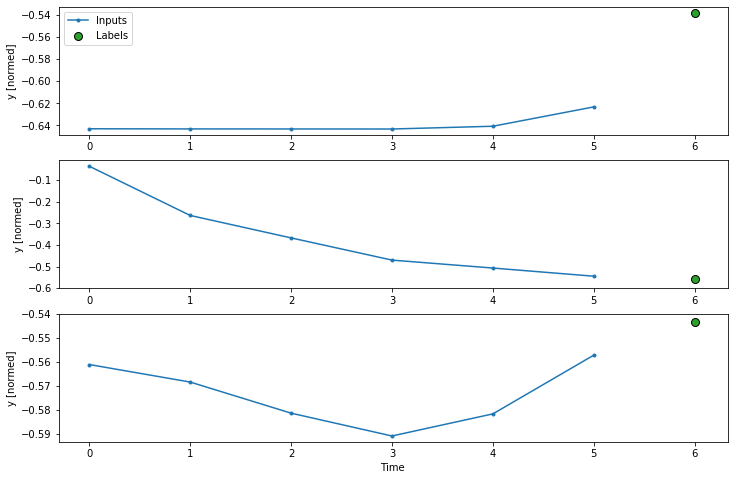

In [66]:
w1.plot()

In [67]:
# Функция для  преобразования  DataFrame временного ряда  в tf.data.Dataset:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [68]:
# Добавим пакет примеров для облегчения доступа и построения графиков:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [74]:
# С помощью свойства Dataset.element_spec
# посмотрим на структуру, тип и форму элементов тренировочного набора данных
w1.train.element_spec

(TensorSpec(shape=(None, 6, 18), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [75]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 18)
Labels shape (batch, time, features): (32, 1, 1)


Total window size: 28
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Label indices: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Label column name(s): None

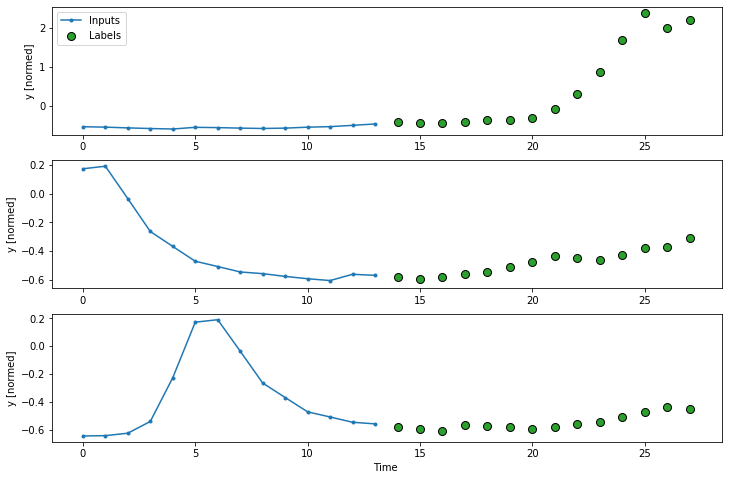

In [69]:
MAX_EPOCHS = 40

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history
OUT_STEPS = 14
multi_window = WindowGenerator(input_width=14,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

### Одношаговая модель 
Реккурентная нейросеть (архитектура LSTM)

In [70]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [71]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['y'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['y']

In [72]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (22, 24, 7)
Output shape: (22, 24, 1)


In [73]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()

In [74]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (22, 24, 7)
Output shape: (22, 24, 1)


In [75]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 32)            5120      
_________________________________________________________________
dense_7 (Dense)              (None, 24, 1)             33        
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


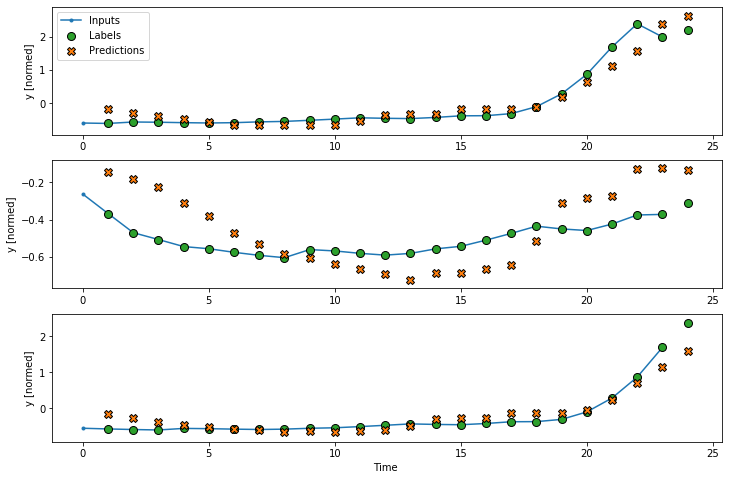

In [76]:
wide_window.plot(lstm_model) # модель неплохо справилась с предсказанием

### Многоступенчатая модель

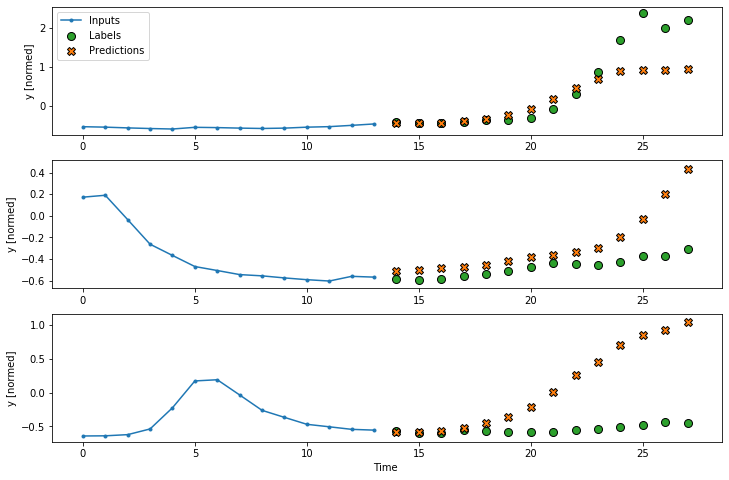

In [79]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
#multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
#multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

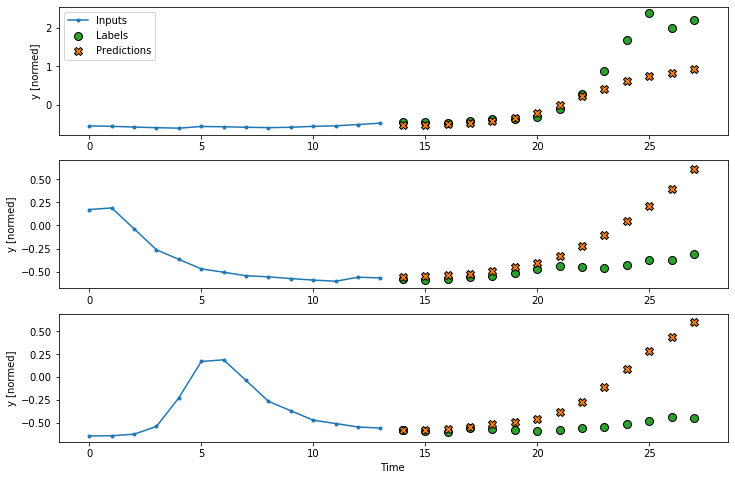

In [78]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

#multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
#multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

## Применение многоступенчато модели временных рядов позволило предсказывать значения довольно точно.

# Даже визуально заметно, что предсказаные точки очень близко располагаются к истинным значениям целевой переменной

# Видим, что данная модель отлично работает и с данными из другого региона!